In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0,1] range
x_train = x_train.reshape(-1, 28, 28, 1)  # Reshape for ConvNet
x_test = x_test.reshape(-1, 28, 28, 1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Convert dataset to DataFrame and show head
train_df = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
train_df['digit'] = y_train
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,digit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


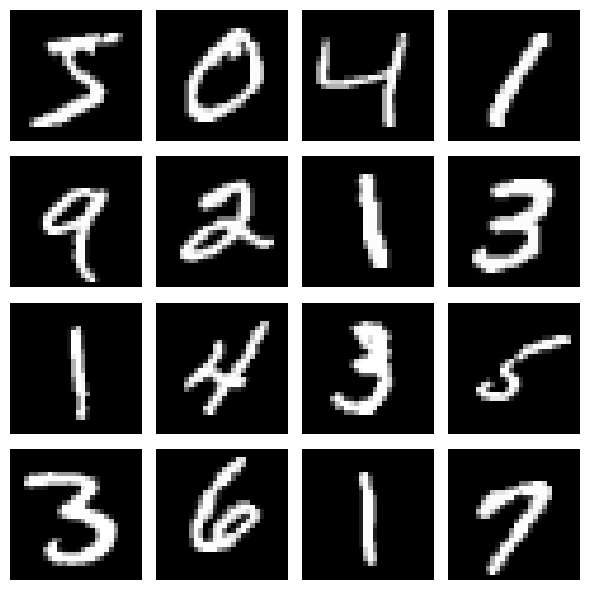

In [8]:
# Display 16 digits from the training set
fig, axes = plt.subplots(4, 4, figsize=(6, 6))  # 4x4 grid
axes = axes.ravel()  # Flatten the 2D array of axes

for i in range(16):  # Display 16 images
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.tight_layout()
plt.show()


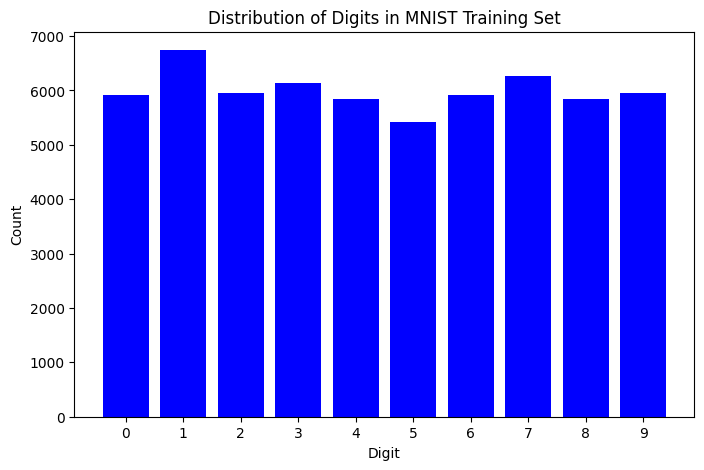

In [ ]:
# Plot number of occurrences of each digit
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8, 5))
plt.bar(unique, counts, color='blue')
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Distribution of Digits in MNIST Training Set")
plt.xticks(unique)
plt.show()

In [ ]:
# Define the LeNet-5 model
def build_lenet5():
    model = keras.Sequential([
        layers.Conv2D(6, kernel_size=5, activation='tanh', input_shape=(28, 28, 1)),
        layers.AveragePooling2D(pool_size=2, strides=2),
        layers.Conv2D(16, kernel_size=5, activation='tanh'),
        layers.AveragePooling2D(pool_size=2, strides=2),
        layers.Flatten(),
        layers.Dense(120, activation='tanh'),
        layers.Dense(84, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Build and compile the model
LeNet5 = build_lenet5()
LeNet5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
LeNet5.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.4,
    height_shift_range=0.5,
    shear_range=0.5,
    zoom_range=0.4
)
datagen.fit(x_train)


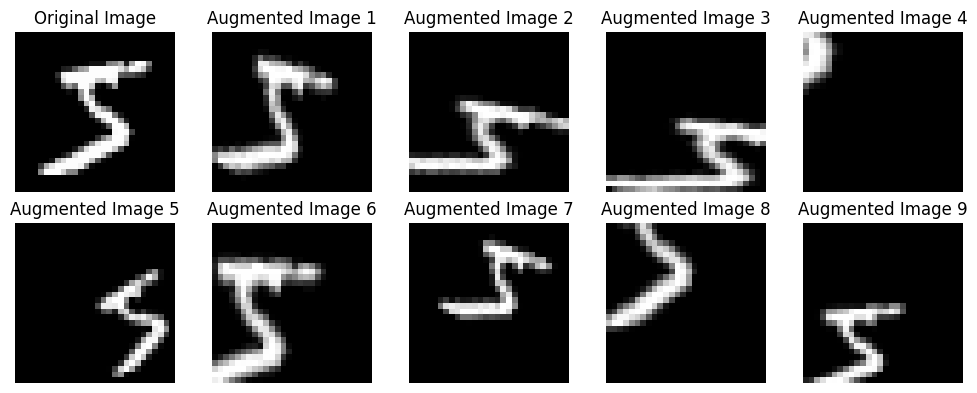

In [ ]:


# Display some augmented images
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'datagen' and 'x_train' are defined as in the previous code

# Generate augmented images from the first image in the training set
x_sample = x_train[0].reshape(1,28,28,1)
augmented_images = datagen.flow(x_sample, batch_size=2)
augmented_images = [next(augmented_images)[0].reshape(28,28) for i in range(9)]

# Plot the original and augmented images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
axes = axes.ravel()

axes[0].imshow(x_train[0].reshape(28, 28), cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

for i in range(9):
    axes[i+1].imshow(augmented_images[i], cmap='gray')
    axes[i+1].set_title(f'Augmented Image {i+1}')
    axes[i+1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2
)
datagen.fit(x_train)


# Train the model with data augmentation
leNet5_history = LeNet5.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))

# Evaluate the model
y_pred = np.argmax(LeNet5.predict(x_test), axis=1)
print(classification_report(y_test, y_pred))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.9742 - loss: 0.0907 - val_accuracy: 0.9872 - val_loss: 0.0400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9772 - loss: 0.0722 - val_accuracy: 0.9884 - val_loss: 0.0357
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 25ms/step - accuracy: 0.9776 - loss: 0.0703 - val_accuracy: 0.9884 - val_loss: 0.0350
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9791 - loss: 0.0687 - val_accuracy: 0.9892 - val_loss: 0.0330
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9800 - loss: 0.0663 - val_accuracy: 0.9887 - val_loss: 0.0373
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.9793 - loss: 0.0672 - val_accuracy: 0.9891 - val_loss: 0.0342
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9796 - loss: 0.0683 - val_accuracy: 0.9864 - val_loss: 0.0401
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 25ms/step - accuracy: 0.9818 -

In [ ]:
model2 = build_lenet5()
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

model2_history = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 12, 12, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 4, 4, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.8762 - loss: 0.4226 - val_accuracy: 0.9684 - val_loss: 0.1013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9722 - loss: 0.0910 - val_accuracy: 0.9798 - val_loss: 0.0670
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9811 - loss: 0.0607 - val_accuracy: 0.9824 - val_loss: 0.0540
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.9839 - val_loss: 0.0520
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9879 - loss: 0.0369 - val_accuracy: 0.9850 - val_loss: 0.0465
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9915 - loss: 0.0286 - val_accuracy: 0.9850 - val_loss: 0.0450
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9907 - loss: 0.0266 - val_accuracy: 0.9861 - val_loss: 0.0447
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9932 -

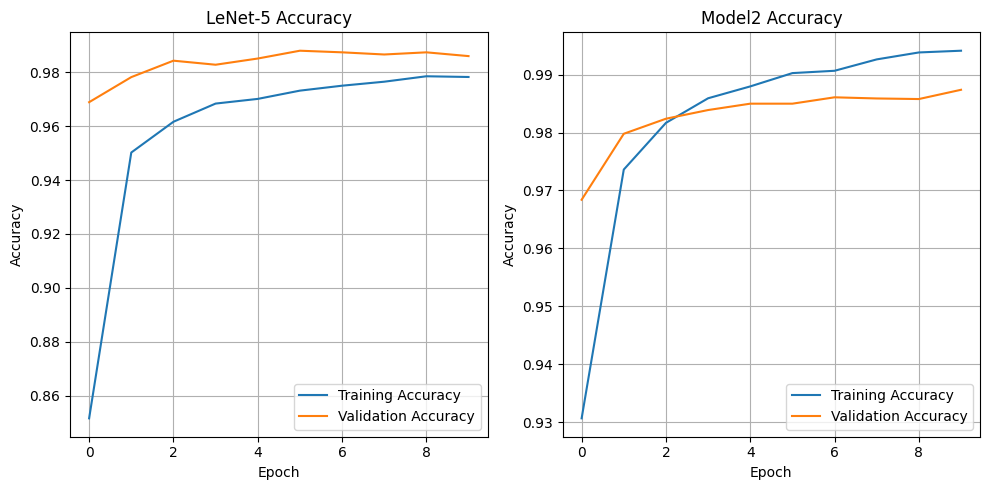

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot LeNet-5 accuracies
plt.subplot(1, 2, 1)
plt.plot(leNet5_history.history['accuracy'], label='Training Accuracy')
plt.plot(leNet5_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LeNet-5 Accuracy')
plt.legend()
plt.grid(True)

# Plot model2 accuracies
plt.subplot(1, 2, 2)
plt.plot(model2_history.history['accuracy'], label='Training Accuracy')
plt.plot(model2_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model2 Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()